In [2]:
import pandas as pd 
import datetime 
import numpy as np
import scipy.stats
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas import DataFrame
import itertools
from math import sqrt
from scipy.stats import norm
import numpy as np

In [3]:
start_date = datetime.datetime(2015, 12, 5)
end_date = datetime.datetime(2017, 12, 5)

source = 'yahoo' 

In [5]:
all_data = {ticker:web.DataReader(ticker,source,start_date,end_date)
            for ticker in ["BTC-USD", "LTC-USD", "BCH-USD","ETH-USD", "IOT-USD", "XRP-USD"]}


In [ ]:
ticker_price = pd.DataFrame({ticker: data['Adj Close']
                                  for ticker, data in all_data.items()})


In [43]:
def brownian_motion(D = 1, N = 100, mu = 0.1, sigma = 0.01, S0 = 1,dt = 1):        
    X = np.random.normal(mu * dt, sigma* np.sqrt(dt), N)
    X = np.cumsum(X)
    S = S0 * np.exp(X)
    return S
dates = pd.date_range('2015-12-05', '2017-12-05')
D = (dates.max()-dates.min()).days / 365
N = dates.size
dt = D/N


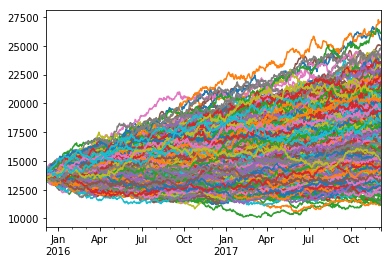

In [42]:
start = ticker_price["BTC-USD"][-1]
m= 1000
for i in range(m):
    btc = pd.Series(brownian_motion(D, N, sigma=0.1, S0=start,dt = dt), index=dates)
    btc.plot()    
plt.show()

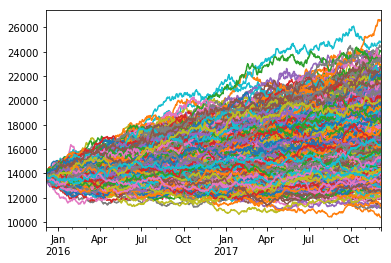

In [44]:
start_price = ticker_price["LTC-USD"][-1]
for i in range(1000):
    ltc = pd.Series(brownian_motion(D, N, sigma=0.1, S0=start,dt =dt), index=dates)
    ltc.plot()    
plt.show()

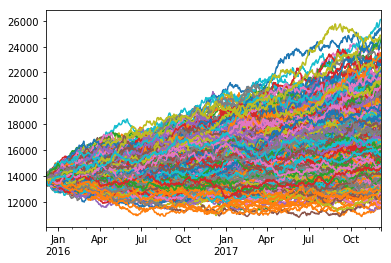

In [46]:
start_price = ticker_price["BCH-USD"][-1]
for i in range(1000):
    bch = pd.Series(brownian_motion(D, N, sigma=0.1, S0=start,dt =dt), index=dates)
    bch.plot()    
plt.show()

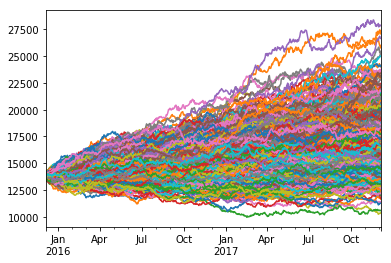

In [38]:
start_price = ticker_price["ETH-USD"][-1]
for i in range(1000):
    eth = pd.Series(brownian_motion(D, N, sigma=0.1, S0=start,dt = dt), index=dates)
    eth.plot()    
plt.show()

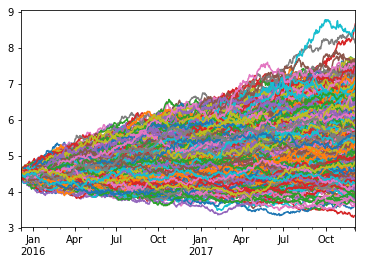

In [31]:
start_price = ticker_price["IOT-USD"][-1]
for i in range(1000):
    iot = pd.Series(brownian_motion(D, N, sigma=0.1, S0=start,dt = dt), index=dates)
    iot.plot()    
plt.show()

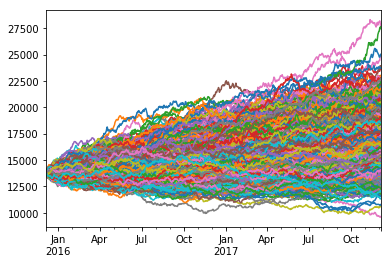

In [47]:
start_price = ticker_price["XRP-USD"][-1]
for i in range(1000):
    xrp = pd.Series(brownian_motion(D, N, sigma=0.1, S0=start,dt =dt), index=dates)
    xrp.plot()    
plt.show()







 



